In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools
from ipywidgets import interact, interactive
import re
import hashlib
from scipy import stats
sns.set(style="dark")
plt.style.use("ggplot")
%matplotlib inline

In [7]:
pip install pymc

  Using cached pymc-5.12.0-py3-none-any.whl (473 kB)
  Using cached pytensor-2.19.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached arviz-0.17.1-py3-none-any.whl (1.7 MB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached xarray_einstats-0.7.0-py3-none-any.whl (31 kB)
  Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Using cached xarray-2024.3.0-py3-none-any.whl (1.1 MB)
  Using cached h5netcdf-1.3.0-py3-none-any.whl (43 kB)
  Using cached cons-0.4.6-py3-none-any.whl
  Using cached logical_unification-0.4.6-py3-none-any.whl
  Using cached miniKanren-1.0.3-py3-none-any.whl
  Using cached etuples-0.3.9-py3-none-any.whl
  Using cached h5py-3.11.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.3 MB)
  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached multipledispatch-1.0.0-py3-none-any.whl (12 kB)
  Attempting uninstall: setuptools
    Found existing ins

In [2]:
copd = pd.read_csv("chronic_obstructive_pulmonary_disease.csv")
copd.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AK,Alaska,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,NaN,Number,...,2,COPD,COPD1_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2020,2020,AL,Alabama,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,NaN,Number,...,1,COPD,COPD1_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2012,2012,AL,Alabama,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,NaN,Number,...,1,COPD,COPD1_1,NMBR,RACE,BLK,NaN,NaN,NaN,NaN
3,2015,2015,AL,Alabama,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,NaN,Number,...,1,COPD,COPD1_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
4,2017,2017,AL,Alabama,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,NaN,Number,...,1,COPD,COPD1_1,NMBR,RACE,BLK,NaN,NaN,NaN,NaN


In [3]:
prompt = 'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years'

In [19]:
ca_gen = copd[copd['LocationAbbr'] ==  'CA']
ca_gen = ca_gen[ca_gen['Question'] == prompt]
ca_gen = ca_gen[ca_gen['DataValueUnit'] == 'cases per 100,000']
ca_gen = ca_gen[ca_gen['DataValueType'] == 'Crude Rate']
ca_gen = ca_gen[ca_gen['StratificationCategoryID1'] == 'GENDER']
# ca = ca[['YearStart', 'LocationAbbr', 'Question', 'DataValueUnit', 'DataValue']]
# ca = ca.sort_values('YearStart')
ca_gen['DataValue_Round'] = round(ca_gen['DataValue'])
# ca['Per 100,000'] = 100000
ca_gen = ca_gen[['YearStart', 'LocationAbbr', 'Question', 'StratificationID1', 'DataValueUnit', 'DataValue_Round']]

In [21]:
ca_gen_2015 = ca_gen[ca_gen['YearStart'] == 2015]

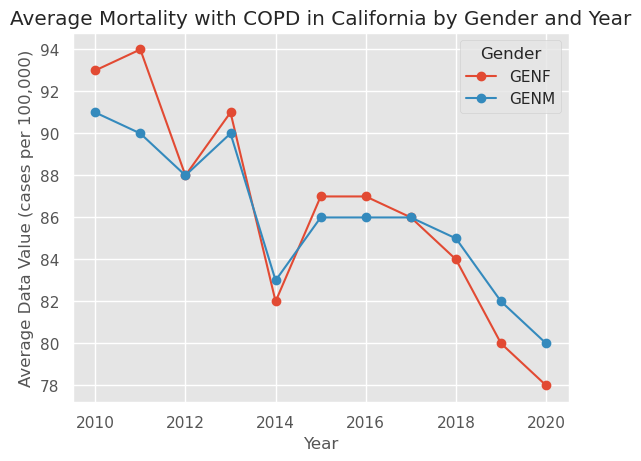

In [31]:
grouped_df = ca_gen.groupby(['YearStart','StratificationID1'])['DataValue_Round'].mean().reset_index()

for gender in grouped_df['StratificationID1'].unique():
    gender_data = grouped_df[grouped_df['StratificationID1'] == gender]
    plt.plot(gender_data['YearStart'], gender_data['DataValue_Round'], marker='o', label=gender)

plt.xlabel('Year')
plt.ylabel('Average Data Value (cases per 100,000)')
plt.title('Average Mortality with COPD in California by Gender and Year')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

In [4]:
ca = copd[copd['LocationAbbr'] ==  'CA']
ca = ca[ca['Question'] == prompt]
ca = ca[ca['DataValueUnit'] == 'cases per 100,000']
ca = ca[ca['DataValueType'] == 'Crude Rate']
ca = ca[ca['StratificationCategoryID1'] == 'OVERALL']
ca = ca[['YearStart', 'LocationAbbr', 'Question', 'DataValueUnit', 'DataValue']]
ca = ca.sort_values('YearStart')
ca['DataValue_Round'] = round(ca['DataValue'])
ca['Per 100,000'] = 100000
ca

,YearStart,LocationAbbr,Question,DataValueUnit,DataValue,DataValue_Round,"Per 100,000"
1273,2010,CA,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",91.8,92.0,100000
2448,2011,CA,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",92.2,92.0,100000
724,2012,CA,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",87.9,88.0,100000
2940,2013,CA,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",90.5,90.0,100000
596,2014,CA,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",82.8,83.0,100000
2085,2015,CA,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",86.6,87.0,100000
4141,2016,CA,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",86.3,86.0,100000
3186,2017,CA,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",86.3,86.0,100000
525,2018,CA,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",84.4,84.0,100000
2142,2019,CA,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",80.6,81.0,100000


Text(0.5, 1.0, 'California Crude Rate of COPD Mortality Among Adults Aged >= 45 Years')

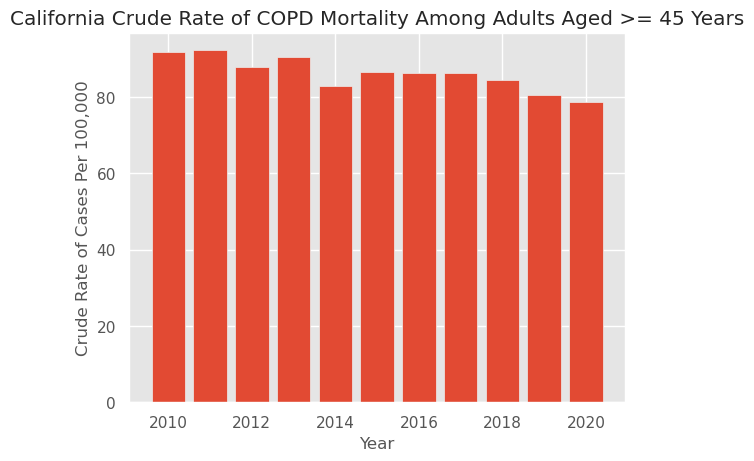

In [5]:
x = ca['YearStart']
y = ca['DataValue']
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Year')
plt.ylabel('Crude Rate of Cases Per 100,000')
plt.title('California Crude Rate of COPD Mortality Among Adults Aged >= 45 Years')

In [9]:
import pymc as pm
import arviz as az

/srv/conda/lib/python3.9/site-packages/_distutils_hack/__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [8]:
pip install pymc

  Using cached pymc-5.12.0-py3-none-any.whl (473 kB)
  Using cached arviz-0.17.1-py3-none-any.whl (1.7 MB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached pytensor-2.19.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached xarray_einstats-0.7.0-py3-none-any.whl (31 kB)
  Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Using cached xarray-2024.3.0-py3-none-any.whl (1.1 MB)
  Using cached h5netcdf-1.3.0-py3-none-any.whl (43 kB)
  Using cached cons-0.4.6-py3-none-any.whl
  Using cached etuples-0.3.9-py3-none-any.whl
  Using cached miniKanren-1.0.3-py3-none-any.whl
  Using cached logical_unification-0.4.6-py3-none-any.whl
  Using cached h5py-3.11.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.3 MB)
  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached multipledispatch-1.0.0-py3-none-any.whl (12 kB)
  Attempting uninstall: setuptools
    Found existing ins

In [10]:
ca.iloc[1,0]

2011

In [5]:
num_years = len(ca['YearStart'])
with pm.Model() as model:
    a = pm.HalfCauchy('a', beta=1)
    b = pm.HalfCauchy('b', beta=1)
    theta = pm.Beta('theta', alpha=a, beta=b, shape=num_years) 
    y = pm.Binomial('y',p=theta, n=ca['Per 100,000'], observed=ca['DataValue_Round'])

    trace_eb = pm.sample(500, chains = 4, tune=200, return_inferencedata=True)

NameError: name 'pm' is not defined

In [8]:
import pymc as pm 

with pm.Model() as model:
    a = pm.Exponential('a', lam=0.5)  # Reparameterize with Exponential distribution
    b = pm.Exponential('b', lam=0.5)  # Reparameterize with Exponential distribution
    theta = pm.Beta('theta', alpha=a, beta=b, shape=num_years) 
    y = pm.Binomial('y', p=theta, n=ca['Per 100,000'], observed=ca['DataValue_Round'])

    trace_eb = pm.sample(500, chains=4, tune=1000, target_accept=0.9, return_inferencedata=True)  # Increase tune steps and target_accept


/srv/conda/lib/python3.9/site-packages/_distutils_hack/__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, theta]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 5 seconds.


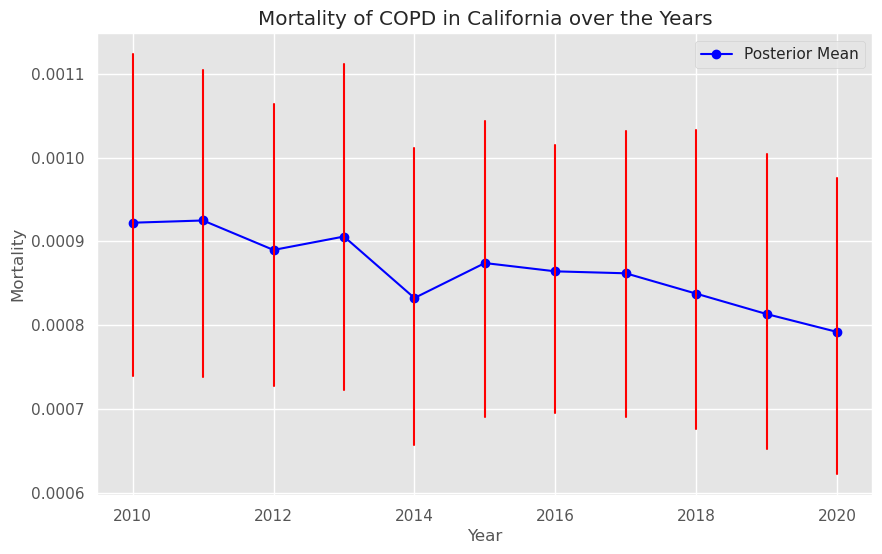

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Assuming 'trace_eb' and 'ca' are defined

# num_years = len(ca)

means = []
hdis = []

for i in np.arange(num_years):
    year_i_sample = np.array([row[i] for row in trace_eb.posterior['theta'][0]])
    mean_theta = np.mean(year_i_sample)
    hdi = az.hdi(year_i_sample, hdi_prob=0.95)
    means.append(mean_theta)
    hdis.append(hdi)

# Convert lists to arrays
means = np.array(means)
hdis = np.array(hdis)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot posterior means as a line plot
ax.plot(ca.iloc[:, 0], means, marker='o', color='blue', label='Posterior Mean')

# Plot credible intervals along y-axis
for i in range(num_years):
    ax.plot([ca.iloc[i, 0], ca.iloc[i, 0]], [hdis[i, 0], hdis[i, 1]], color='red')

ax.set_xlabel('Year')
ax.set_ylabel('Mortality')
ax.set_title('Mortality of COPD in California over the Years')
ax.legend()
plt.grid(True)
plt.show()

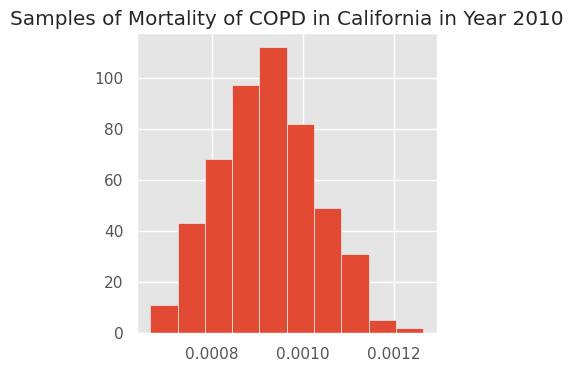

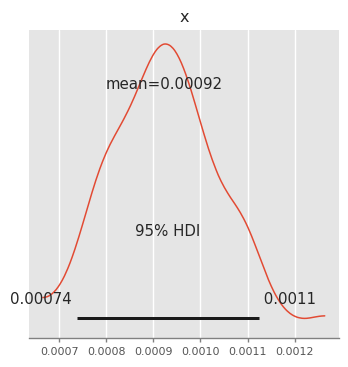

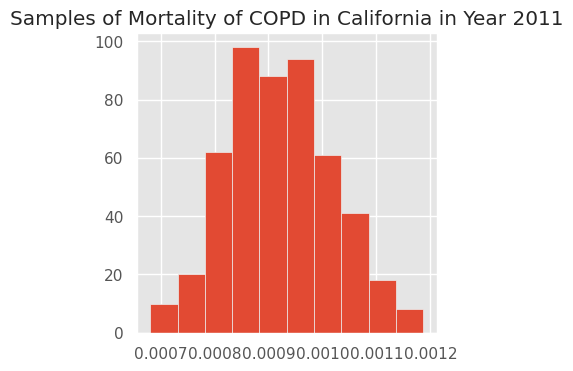

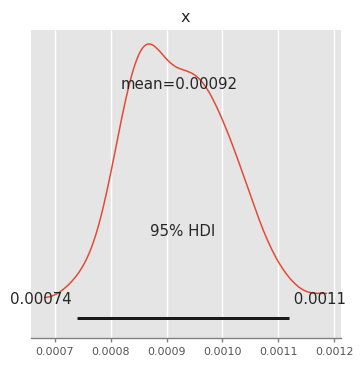

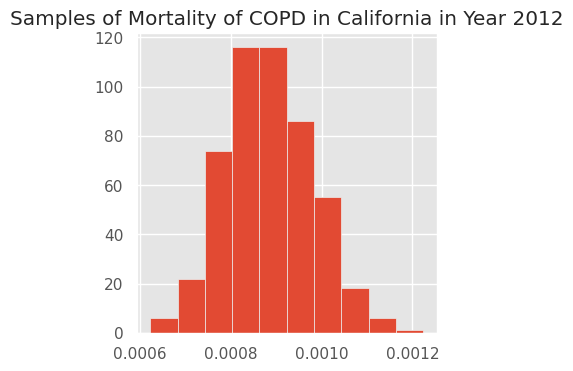

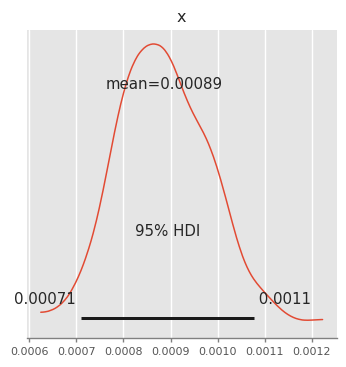

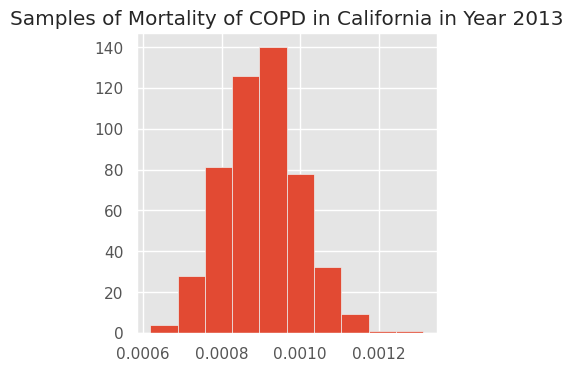

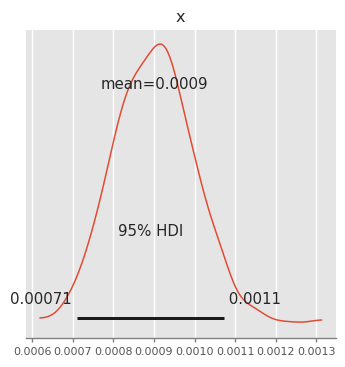

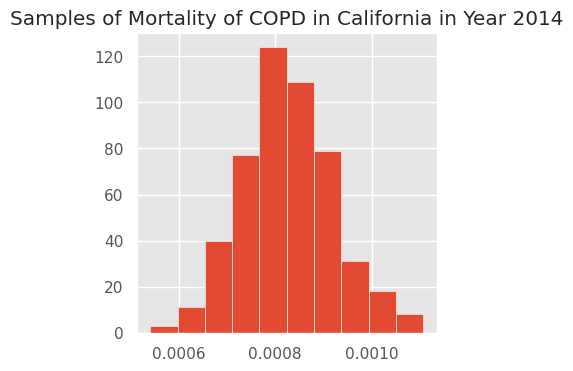

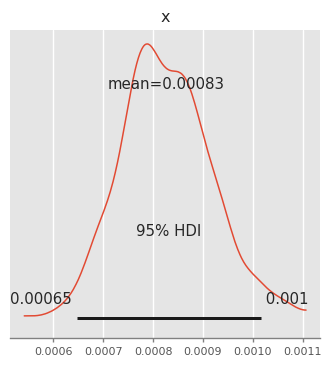

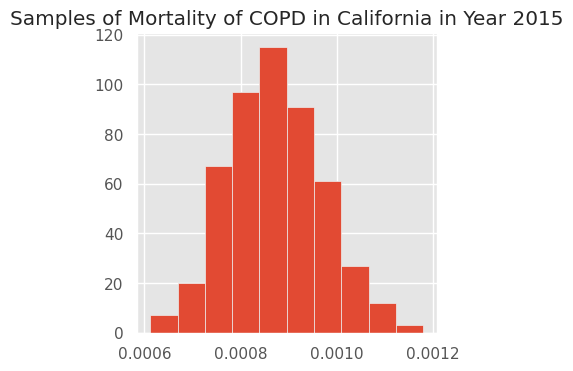

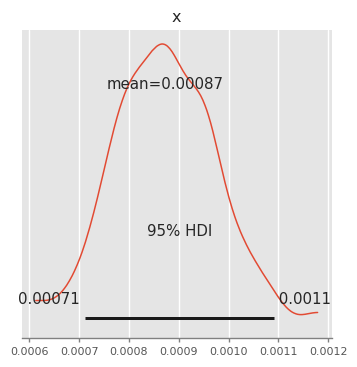

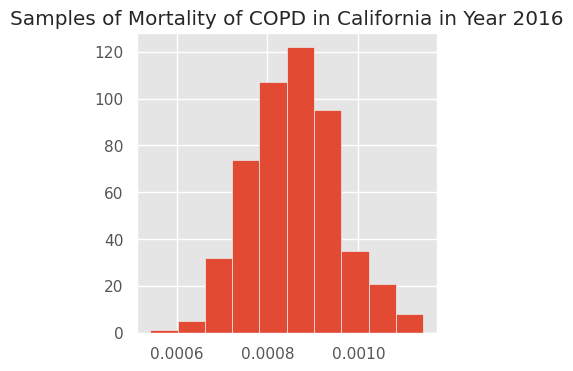

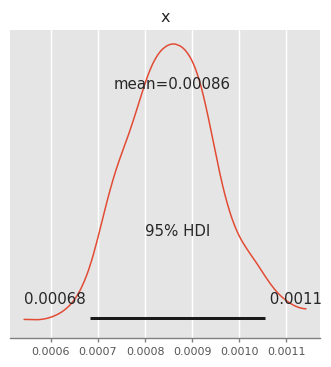

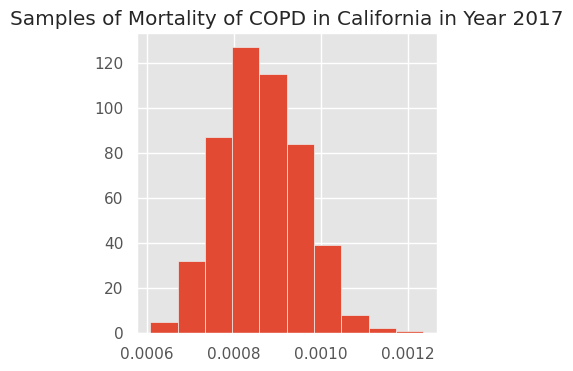

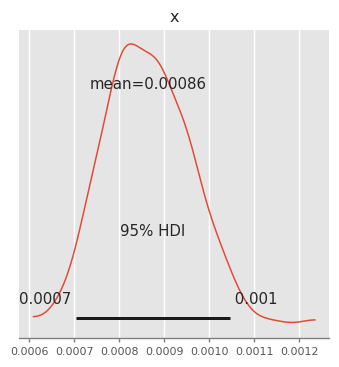

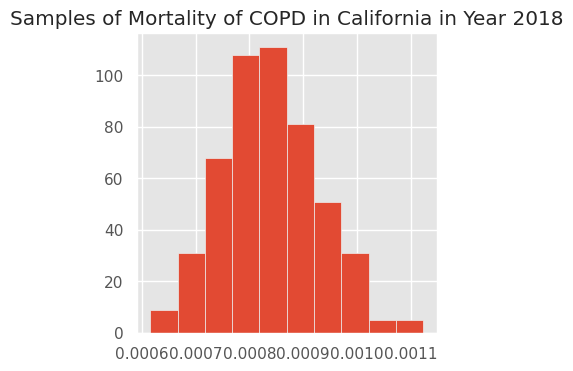

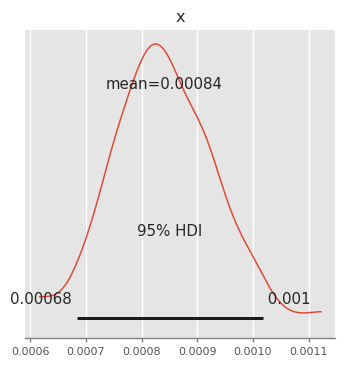

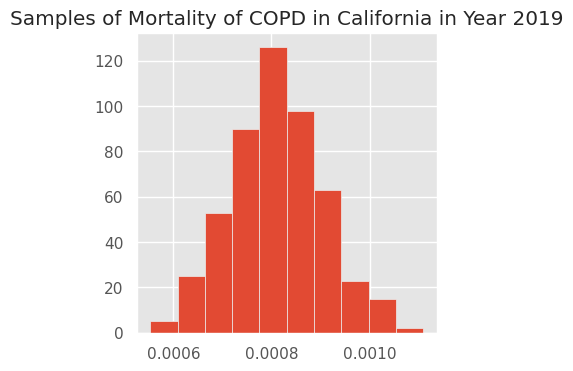

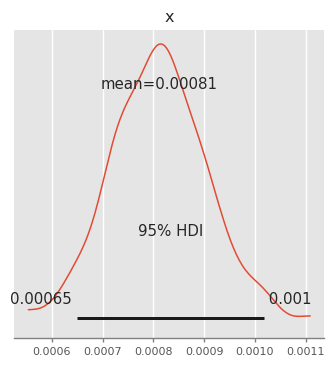

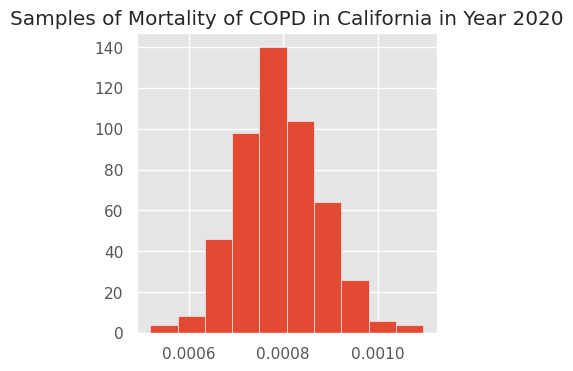

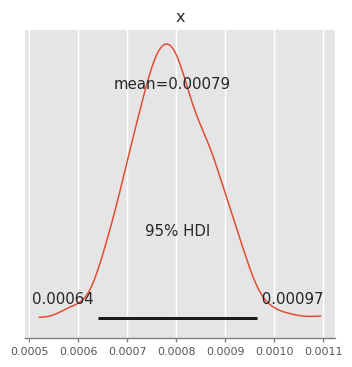

In [33]:
for i in np.arange(num_years):
    fig=plt.figure(figsize=(3,3))
    his=fig.add_axes([0,0,1,1])
    year_i_sample = [row[i] for row in trace_eb.posterior['theta'][0]]
    plt.hist(year_i_sample)
    plt.title("Samples of Mortality of COPD in California in Year " + str(ca.iloc[i,0]))
    region_array = np.array([row[i] for row in trace_eb.posterior['theta'][0]])
    az.plot_posterior(region_array, figsize = (4,4), hdi_prob = 0.95)
    plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Calculate the mean and credible interval for theta across different years
mean_theta = np.mean(trace_eb.posterior['theta'], axis=0)
hdi_theta = az.hdi(trace_eb.posterior['theta'], hdi_prob=0.95)

# Plot mean of theta with credible interval
plt.figure(figsize=(10, 6))
for i in range(num_years):
    lower_error = float(mean_theta[i] - hdi_theta.sel(hdi='lower', theta_dim_0=i).values)
    upper_error = float(hdi_theta.sel(hdi='upper', theta_dim_0=i).values - mean_theta[i])
    plt.errorbar(ca['YearStart'].unique()[i], mean_theta[i], yerr=[[lower_error], [upper_error]], fmt='o', label=str(ca['YearStart'].unique()[i]))

plt.xlabel('Year')
plt.ylabel('Mean of Theta')
plt.title('Mean Mortality of COPD in California Across Different Years')
plt.legend()
plt.grid(True)
plt.show()


TypeError: unsupported operand type(s) for -: 'float' and 'method'

<Figure size 1000x600 with 0 Axes>